# Regular regression : RIDGE

0. Import usual librairies

In [5]:
import pandas as pd

  1. Load the boston housing price dataset with the command :
  
 
```
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
```

In [6]:
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

y = pd.DataFrame(boston.get("target"), columns=["prices"])

display(boston_df.head())

display(y.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,prices
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


  2. Create a dataframe containing the explanatory variables and another one containing only the target variable, which is house prices.

In [7]:
# Separate target variable Y from features X
print("...Done.")
print(y.head())
print()
print(boston_df.head())
print()

...Done.
   prices
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  



3. Use the `train_test_split` command from the `sklearn.model_selection` package to create a training sample containing 70% of the observations and a test sample containing 30% of the observations.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(boston_df, y, test_size=0.3, random_state=0)
print("...Done.")
print()

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Dividing into train and test sets...
...Done.



4. Generate a classical linear regression model, a ridge model where alpha is 0.01 and a ridge model where alpha is 100.

In [10]:
from sklearn.linear_model import Ridge, LinearRegression

models = {"linear" : LinearRegression(), 
          "ridge 0.01": Ridge(alpha=0.01), 
          "ridge 100": Ridge(alpha=100)}

5. Train these models on the learning data

In [11]:
for _, model in models.items():
    model.fit(X_train, y_train)

6. Generate performance scores for the three models on the learning and validation sample using the .score attribute.

In [12]:
for name, model in models.items():
    print(f"Score {name}, Train score : {model.score(X_train, y_train)}, Test score : {model.score(X_test, y_test)}") 

Score linear, Train score : 0.7645451026942549, Test score : 0.6733825506400195
Score ridge 0.01, Train score : 0.7645451006471642, Test score : 0.6733764717325972
Score ridge 100, Train score : 0.7389220452609575, Test score : 0.6318772220574332


7. Compare the coefficients of the three models using a graph, what do you notice?

In [26]:
coefs = {name: model.coef_[0] for name, model in models.items()}
abs_coef = {name + " abs": abs(model.coef_[0]) for name, model in models.items()}
df_coefs = pd.DataFrame(index=boston_df.columns, data={**coefs, **abs_coef})
df_coefs.head()

,linear,ridge 0.01,ridge 100,linear abs,ridge 0.01 abs,ridge 100 abs
CRIM,-1.011901,-1.011799,-0.715429,1.011901,1.011799,0.715429
ZN,1.050280,1.050086,0.557659,1.050280,1.050086,0.557659
INDUS,0.079210,0.078902,-0.462932,0.079210,0.078902,0.462932
CHAS,0.618962,0.619012,0.675175,0.618962,0.619012,0.675175
NOX,-1.873691,-1.873298,-0.669166,1.873691,1.873298,0.669166


In [63]:
df_coefs.reset_index().drop("index", axis=1).stack().reset_index()

,level_0,level_1,0
0,0,linear,-1.011901
1,0,ridge 0.01,-1.011799
2,0,ridge 100,-0.715429
3,0,linear abs,1.011901
4,0,ridge 0.01 abs,1.011799
...,...,...,...
73,12,ridge 0.01,-3.440337
74,12,ridge 100,-2.592446
75,12,linear abs,3.440498
76,12,ridge 0.01 abs,3.440337


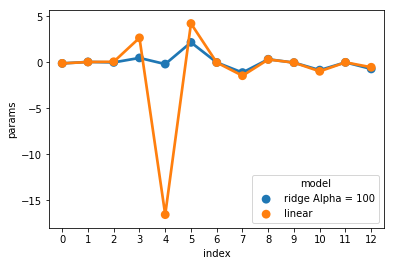

---> We notice that we have been able to penalize the coefficient linked to the NOX Feature to limit its impact.